## Importing the goodies

In [18]:
import Augmentor
from tqdm.notebook import tqdm
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt  
from numpy import moveaxis
chicken_path  = "raw_images/chicken/"
pig_path = "raw_images/pig/"
panda_path = "raw_images/panda/"
terrain_path = "raw_images/terrain/"

## Defining an image augmentation pipeline from raw screenshots
* `p.rotate()` rotates the image by a small but random angle 
* `p.zoom()` zooms into the image by a random factor between min_factor and max_factor
* `p.random_distortion()` distorts then image and produces synthetic image that looks similar to the original image at first sight but is actually different
* `p.flip_left_right()` gives us a mirror image of the original image
*  The `probability` argument helps induce a larger degree of randomness in the trainng data by giving us images which passed through various permutations of the augmentation techniques. One image might have 2 augmented images with *(random_distortion, zoom)* and *(rotate, zoom, flip)*

In [3]:
def augment_images(source_folder, num_images):
    p = Augmentor.Pipeline(source_folder)
    p.rotate(probability=0.5, max_left_rotation=10, max_right_rotation=10)
    p.zoom(probability=0.5, min_factor=1.1, max_factor=1.3)

    p.random_distortion(probability=0.5, grid_width=3, grid_height=3, magnitude=4)
    p.flip_left_right(probability=0.7)
    p.resize(probability=1.0, width=25, height=25)

    p.sample(num_images)

## Producing 1500 images of each class

In [4]:
augment_images(chicken_path, 1500)
augment_images(pig_path, 1500)
augment_images(panda_path, 1500)
augment_images(terrain_path, 1500)


Initialised with 324 image(s) found.
Output directory set to raw_images/chicken/output.

Processing <PIL.Image.Image image mode=RGB size=25x25 at 0x7EFD80158828>: 100%|██████████| 1500/1500 [00:03<00:00, 394.72 Samples/s] 
Processing <PIL.Image.Image image mode=RGB size=25x25 at 0x7EFD80151630>:   0%|          | 7/1500 [00:00<00:57, 26.15 Samples/s] 

Initialised with 152 image(s) found.
Output directory set to raw_images/pig/output.

Processing <PIL.Image.Image image mode=RGB size=25x25 at 0x7EFD801B9C50>: 100%|██████████| 1500/1500 [00:03<00:00, 384.40 Samples/s] 
Processing <PIL.Image.Image image mode=RGB size=25x25 at 0x7EFD803038D0>:   0%|          | 5/1500 [00:00<00:44, 33.86 Samples/s] 

Initialised with 369 image(s) found.
Output directory set to raw_images/panda/output.

Processing <PIL.Image.Image image mode=RGB size=25x25 at 0x7EFD80136F28>: 100%|██████████| 1500/1500 [00:03<00:00, 395.32 Samples/s] 
Executing Pipeline:   0%|          | 0/1500 [00:00<?, ? Samples/s]

Initialised with 29 image(s) found.
Output directory set to raw_images/terrain/output.

Processing <PIL.Image.Image image mode=RGBA size=25x25 at 0x7EFD80289940>: 100%|██████████| 1500/1500 [00:15<00:00, 98.90 Samples/s] 


### Bridging the gap from raw image folders to numpy arrays which are ready for training with labels

* `img_to_arr()` returns the pizel values of an image from a certain path in form of a 2D (grayscale) or 3D (RGB) numpy array
* `generate_train_data()` iterates through all the images in a folder and stacks them in form of numpy arrays with a certain label in the second column

In [19]:
def img_to_arr(im_path, move_axis = True):
    try:
        x = cv2.imread(im_path) 
        x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)

    except:
        return
    if move_axis == True:
        x = moveaxis(x, 2, 0)
    return x
def generate_train_data(source_folder, save_path, filename,  label = 0):
    save_path = save_path + filename
    final_stack = []
    c = 0
    for i in tqdm(os.listdir(source_folder)):   
        
        im_path = source_folder + "/" + i
        im_arr = img_to_arr(im_path, move_axis = True)
        stack_element = [im_arr, label]
        stack_element = np.array(stack_element)
        final_stack.append(stack_element)

    final_stack = np.array(final_stack)
    fmt_name = save_path
    np.save(fmt_name, final_stack)
    print ("saved -- ", fmt_name)
    
def view_samples_from_training_data(arr, skip_val):
    images = []
    for i in range (0,len(arr), skip_val):
        foo = np.moveaxis(arr[i][0], 0, 2)
        images.append(foo)
    f = plt.figure(figsize = (20,20))
    for m in range (1,len(images)):
        f.add_subplot(1,len(images), m)
        plt.imshow(images[m])
    plt.show()

In [20]:
generate_train_data(source_folder = chicken_path + "output/", save_path = "numpy/", filename = "chicken.npy", label = 0)

generate_train_data(source_folder = pig_path + "output/", save_path = "numpy/", filename = "pig.npy", label = 1)

generate_train_data(source_folder = panda_path + "output/", save_path = "numpy/", filename = "panda.npy", label = 2)

generate_train_data(source_folder = terrain_path + "output/", save_path = "numpy/", filename = "terrain.npy", label = 3)


saved --  numpy/chicken.npy



saved --  numpy/pig.npy



saved --  numpy/panda.npy



saved --  numpy/terrain.npy


## Time to see how our data looks like

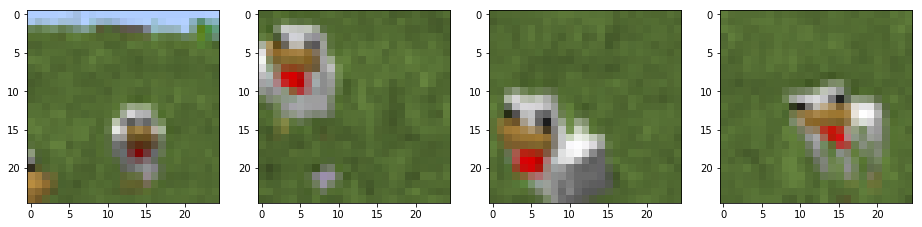

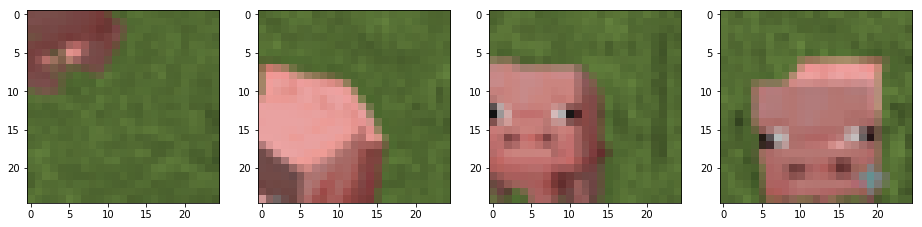

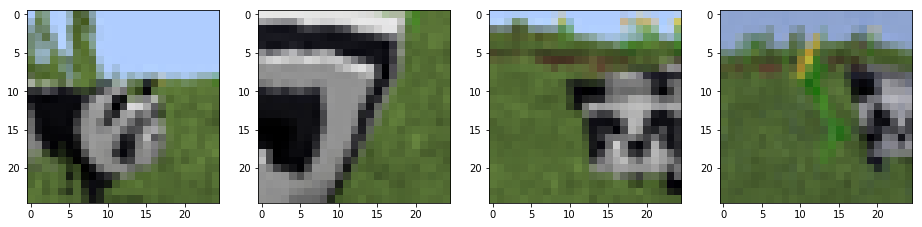

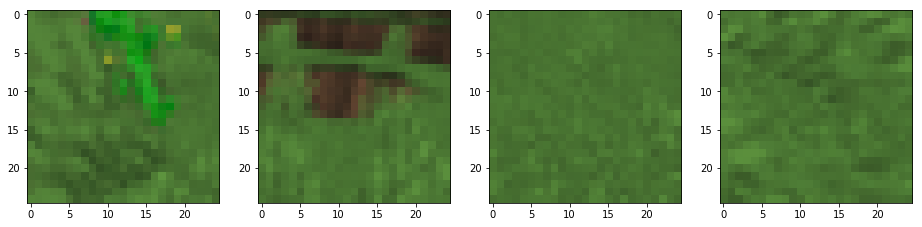

In [21]:
chickens = np.array(np.load("numpy/chicken.npy", allow_pickle = True))
pigs = np.array(np.load("numpy/pig.npy", allow_pickle = True))
panda_bois = np.array(np.load("numpy/panda.npy", allow_pickle = True))
terrain = np.array(np.load("numpy/terrain.npy", allow_pickle = True))


view_samples_from_training_data(chickens, skip_val= 300)
view_samples_from_training_data(pigs, skip_val= 300)
view_samples_from_training_data(panda_bois, skip_val= 300)
view_samples_from_training_data(terrain, skip_val= 300)
